## Goal:
---
Beta Bank customers are leaving. They need to predict whether a customer will leave the bank soon using the data on clients’ past behavior and termination of contracts with the bank.


### Stages:
1. Data Preprocessing: Clean and organize the data, ensuring it's ready for analysis.
2. Exploratory Data Analysis (EDA): Perform an initial analysis to understand the data distribution and identify key trends.
3. ID Target/Feature Variables: Find out exactly what variable is being tested.
4. Split Dataset: Split dataset up into training, validating & test sets.
5. Scale Numeric Features: Set all of the feature variables on equal fields.
6. Fix Class Imbalances: Ensure the classes for the target variable are equally represented.
7. Determine Best Model: Train, fine tune, & evaluate the appropriate models for the task.
8. Analyze ROC Value/Curve: Use the ROC value/curve to gain another perspective on the model's quality.

## Import Neccessary Modules & Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score, r2_score, mean_squared_error, mean_absolute_error,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle, resample

## Load Dataset
---

In [2]:
bank_df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
bank_df.head(5)

In [ ]:
bank_df.info()

## Conduct Exploratory Data Analysis (EDA)
---

### Null Check
---

In [3]:
bank_df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

### Duplicates Check
---

In [4]:
bank_df.duplicated().sum()

0

After loading the dataset & viewing the overall structure & data types, there appears to be a couple of missing values in the Tenure column. With that being said, simply deleting these values from the dataset shouldn't alter the data in any significant way. However, the dataset doesn't contain any duplicate values, which is a good thing. Also, the dataframe column needs case lowering for the column names

In [5]:
 bank_df = bank_df.dropna()

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


After dealing with general structure of the dataset i.e. dealing with nulls, duplicates & lowering the case for columns, it's time to prep the neccessary features (columns) for the machine learning model. In this project, the following columns are broken into features & target.

<b>1. Target:<b> exited column

<b>2. Features:<b> every column but the exited column

In [7]:
print(bank_df.dtypes)
bank_df.head()

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


With the target variable in mind, some of these features don't help predict those values & just appear to just be for description. The following variables that don't directly act as inputs for the prediction of the target variable are:

1. rownumber
2. customerid
3. surname

Since these features won't add any value to the model, these should be dropped from the dataset. To note, there are few features that seem questionable & could be argued as potential contributors to the target variable. These variable are:

1. geography 
2. gender 
3. age 

These are variables that help describe the observation but don't, at face value, contribute to a person leaving the bank. However these features can help in training the model by feeding it more informaton to be better a disclosing or uncovering unseen patterns which can lead to more accurate predictions. 

In [8]:
bank_df = bank_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])  # Drop specific columns

In [9]:
bank_df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4021,772,Germany,Female,48,6.0,108736.52,1,1,0,184564.67,1
3348,825,France,Male,40,6.0,132308.22,1,0,0,117122.50,0
4943,528,Spain,Male,43,7.0,97473.87,2,1,1,159823.16,0
832,732,Germany,Female,29,1.0,154333.82,1,1,1,138527.56,0
4607,653,France,Male,51,3.0,0.00,1,1,0,170426.65,1
2435,608,Germany,Male,42,8.0,131390.75,2,1,0,71178.09,0
1370,769,France,Female,26,7.0,0.00,2,1,0,176843.53,0
9757,501,France,Male,35,6.0,99760.84,1,1,1,13591.52,0
5810,495,Spain,Female,42,7.0,0.00,2,0,0,130404.53,0
9749,533,France,Female,35,8.0,0.00,2,1,1,187900.12,0


After looking at the number of unique values within the geography column, encoding the values along with the gender column via One-Hot Encoding seems appropriate.

## Create Dummy Variables via OHE
---

In [10]:
df2=pd.get_dummies(bank_df[["Gender", "Geography"]])
bank_df_new=pd.concat([bank_df,df2],axis=1)
bank_df_new = bank_df_new.drop(columns=['Gender', 'Geography'])  # Drop specific columns
bank_df_new.columns = bank_df_new.columns.str.lower()
bank_df_new.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_female,gender_male,geography_france,geography_germany,geography_spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0,0,0,1


After viewing the dataframe after making the necessary changes, it is time to properly scale the feature variables.

## Define Features and Target/Split Dataset/Scale Features
---

In [11]:
target = bank_df_new['exited']
features = bank_df_new.drop('exited', axis=1)

features_train, features_rem, target_train, target_rem = train_test_split(features, target, test_size= 0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem, target_rem, test_size=0.5, random_state=12345)

In [12]:
scaler = StandardScaler()
scaler.fit(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

In [13]:
#info description of training, validating & test sets
print('training features:', features_train.shape)
print('training target:', target_train.shape)
print('validating features:', features_valid.shape)
print('validating target:', target_valid.shape)
print('test features:', features_test.shape)
print('test target:', target_test.shape)

training features: (5454, 13)
training target: (5454,)
validating features: (1818, 13)
validating target: (1818,)
test features: (1819, 13)
test target: (1819,)


## Decision Tree Classifier
---

### Base Level Model Training
---

In [14]:
dt_model = DecisionTreeClassifier(random_state=12345)
dt_model.fit(features_train, target_train)
dt_pred_valid = dt_model.predict(features_valid)

print("Classification Report for Validating Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_valid, dt_pred_valid))
print('recall:', recall_score(target_valid, dt_pred_valid))
print('precision:', precision_score(target_valid, dt_pred_valid))
print('F1:', f1_score(target_valid, dt_pred_valid))
print('confusion matrix:', confusion_matrix(target_valid, dt_pred_valid))

Classification Report for Validating Set
--------------------------------------------------
accuracy: 0.7926292629262927
recall: 0.0
precision: 0.0
F1: 0.0
confusion matrix: [[1441    0]
 [ 377    0]]


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt_model.fit(features_train, target_train)
dt_pred_test = dt_model.predict(features_test)

print("Classification Report for Testing Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_test, dt_pred_test))
print('recall:', recall_score(target_test, dt_pred_test))
print('precision:', precision_score(target_test, dt_pred_test))
print('F1:', f1_score(target_test, dt_pred_test))
print('confusion matrix:', confusion_matrix(target_test, dt_pred_test))

According to both the classification report & confusion matrix for the validating & test sets, the accuracy is relatively high, which represents a marker for a strong model. However, looking at both the recall & precision, the values are at zero which indicates imbalanced data. Moreover, the confusion matrix supports this by only showing values for the negative class.

To fix this, upsampling seems the best in this situation given that downsampling would just bring the observations of the frequent class down & that wouldn't leave us with much data to train the model, which doesn't help the situation.

### Check Class Balance
---

In [15]:
print(bank_df_new['exited'].value_counts(normalize = True)) # Check the target distribution
print(bank_df_new['exited'].value_counts())

0    0.796062
1    0.203938
Name: exited, dtype: float64
0    7237
1    1854
Name: exited, dtype: int64


<AxesSubplot:ylabel='Exited'>

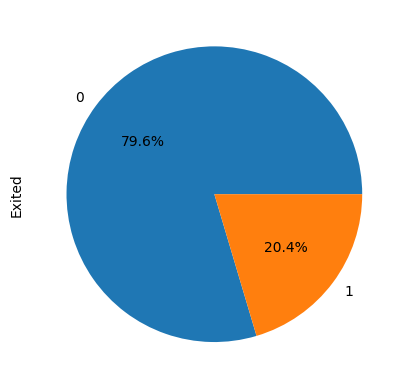

In [16]:
bank_df_new.groupby('exited').size().plot(kind='pie', y='exited', label='Exited', autopct='%1.1f%%')

After checking out the distribution of the two classes, it's apparent that there is a significant imbalance which could cause bias in the results.

## Fix Class Imbalance
---

In [17]:
value_one = bank_df_new[bank_df_new['exited'] == 1]
value_zero = bank_df_new[bank_df_new['exited'] == 0]

value_one_upsample = resample(value_one, replace=True, n_samples=len(value_zero), random_state=12345)

bank_df_new = pd.concat([value_zero, value_one_upsample])

print(bank_df_new['exited'].value_counts(normalize = True)) # Check the target distribution
print(bank_df_new['exited'].value_counts())

0    0.5
1    0.5
Name: exited, dtype: float64
0    7237
1    7237
Name: exited, dtype: int64


<AxesSubplot:ylabel='Exited'>

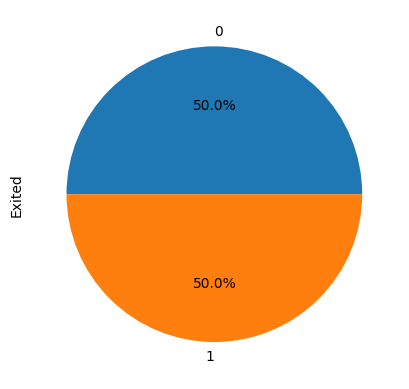

In [18]:
bank_df_new.groupby('exited').size().plot(kind='pie', y='exited', label='Exited', autopct='%1.1f%%')

## Define Features and Target/ Split Upsamped Dataset/Scale Features
---

In [ ]:
target = bank_df_new['exited']
features = bank_df_new.drop('exited', axis=1)

features_train, features_rem, target_train, target_rem = train_test_split(features, target, test_size= 0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem, target_rem, test_size=0.5, random_state=12345)

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

## Decision Tree Classifier
---

### Base Level Model Training
---

In [ ]:
dt_model.fit(features_train, target_train)
dt_pred_valid_us = dt_model.predict(features_valid)

print("Classification Report for Validating Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_valid, dt_pred_valid_us))
print('recall:', recall_score(target_valid, dt_pred_valid_us))
print('precision:', precision_score(target_valid, dt_pred_valid_us))
print('F1:', f1_score(target_valid, dt_pred_valid_us))
print('confusion matrix:', confusion_matrix(target_valid, dt_pred_valid_us))

In [ ]:
dt_model.get_params()

### Hyperparameter Tuning
---

In [ ]:
dt_param_grid = {'max_depth': list(range(1, 30))}

dt_grid_search = GridSearchCV(dt_model, dt_param_grid,cv = 10, scoring='f1')

dt_grid_search.fit(features_train, target_train)

print(f"Best Parameters: {dt_grid_search.best_params_}")
print(f"Best Score: {dt_grid_search.best_score_}")

### Tuned Model Evaluation
---

In [ ]:
dt_model_tuned = DecisionTreeClassifier(random_state=12345, max_depth=24)
dt_model.fit(features_train, target_train)
dt_pred_valid_us = dt_model.predict(features_valid)

print("Classification Report for Validating Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_valid, dt_pred_valid_us))
print('recall:', recall_score(target_valid, dt_pred_valid_us))
print('precision:', precision_score(target_valid, dt_pred_valid_us))
print('F1:', f1_score(target_valid, dt_pred_valid_us))
print('confusion matrix:', confusion_matrix(target_valid, dt_pred_valid_us))

In [ ]:
dt_model_tuned.fit(features_train, target_train)
dt_pred_test_us_t = dt_model_tuned.predict(features_test)

print("Classification Report for Test Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_test, dt_pred_test_us_t))
print('recall:', recall_score(target_test, dt_pred_test_us_t))
print('precision:', precision_score(target_test, dt_pred_test_us_t))
print('F1:', f1_score(target_test, dt_pred_test_us_t))
print('confusion matrix:', confusion_matrix(target_test, dt_pred_test_us_t))

## Random Forest Classifier
---

### Base Level Model Training
---

In [ ]:
rf_model = RandomForestClassifier(random_state=12345)
rf_model.fit(features_train, target_train)
rf_pred_valid = rf_model.predict(features_valid)
print("Classification Report for Validating Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_valid, rf_pred_valid))
print('recall:', recall_score(target_valid, rf_pred_valid))
print('precision:', precision_score(target_valid, rf_pred_valid))
print('F1:', f1_score(target_valid, rf_pred_valid))
print('confusion matrix:', confusion_matrix(target_valid, rf_pred_valid))

### Hyperparameter Tuning
---

In [ ]:
rf_param_grid = {'max_depth': [10, 20, 30],
                'n_estimators': [100, 200, 300]}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid,cv = 10, scoring='f1')

rf_grid_search.fit(features_train, target_train)

print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best Score: {rf_grid_search.best_score_}")

### Tuned Model Evaluation
---

In [ ]:
rf_model_tuned = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=12345)
rf_model_tuned.fit(features_train, target_train)
rf_pred_valid_tuned = rf_model_tuned.predict(features_valid)

print("Classification Report for Validating Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_valid, rf_pred_valid_tuned))
print('recall:', recall_score(target_valid, rf_pred_valid_tuned))
print('precision:', precision_score(target_valid, rf_pred_valid_tuned))
print('F1:', f1_score(target_valid, rf_pred_valid_tuned))
print('confusion matrix:', confusion_matrix(target_valid, rf_pred_valid_tuned))

In [ ]:
rf_model_tuned.fit(features_train, target_train)
rf_pred_test_tuned = rf_model_tuned.predict(features_test)

print("Classification Report for Test Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_test, rf_pred_test_tuned))
print('recall:', recall_score(target_test, rf_pred_test_tuned))
print('precision:', precision_score(target_test, rf_pred_test_tuned))
print('F1:', f1_score(target_test, rf_pred_test_tuned))
print('confusion matrix:', confusion_matrix(target_test, rf_pred_test_tuned))

## Logistic Regression
---

### Base Level Model Training
---

In [ ]:
lr_model = LogisticRegression(random_state=12345)
lr_model.fit(features_train, target_train)
lr_pred_valid = lr_model.predict(features_valid)

print("Classification Report for Validating Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_valid, lr_pred_valid))
print('recall:', recall_score(target_valid, lr_pred_valid))
print('precision:', precision_score(target_valid, lr_pred_valid))
print('F1:', f1_score(target_valid, lr_pred_valid))
print('confusion matrix:', confusion_matrix(target_valid, lr_pred_valid))

### Test Model Evaluation
---

In [ ]:
lr_model.fit(features_train, target_train)
lr_pred_test = lr_model.predict(features_test)

print("Classification Report for Testing Set")
print("--------------------------------------------------")
print('accuracy:', accuracy_score(target_test, lr_pred_test))
print('recall:', recall_score(target_test, lr_pred_test))
print('precision:', precision_score(target_test, lr_pred_test))
print('F1:', f1_score(target_test, lr_pred_test))
print('confusion matrix:', confusion_matrix(target_test, lr_pred_test))

## AUC- ROC Value
---

In [ ]:
probabilities_valid = lr_model.predict_proba(features_valid)
lr_probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, lr_probabilities_one_valid)

plt.figure()

# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR ROC curve')

plt.show()

print('AUC-ROC Score:', roc_auc_score(target_valid, lr_probabilities_one_valid))

In [ ]:
probabilities_valid = rf_model_tuned.predict_proba(features_valid)
rf_probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, rf_probabilities_one_valid)

plt.figure()

# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC curve')

plt.show()

print('AUC-ROC Score:', roc_auc_score(target_valid, rf_probabilities_one_valid))

In [ ]:
probabilities_valid = dt_model_tuned.predict_proba(features_valid)
dt_probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, dt_probabilities_one_valid)

plt.figure()

# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC curve')

plt.show()

print('AUC-ROC Score:', roc_auc_score(target_valid, dt_probabilities_one_valid))

## Conclusion
---

After training all of the classification models, it seems that the Logistic Regression model holds the sastisfactory F1 level (>0.59) on the testing set.

Due to low F1 levels on the validating set after tuning the hyperparameters, the Decision Tree & Random Forest classifiers don't seem fit to carry out the business task of predicting when people will leave the bank.

Moreover, both the ROC curve & values show that the Logistic Regression model is a better quality model(the higher the curve, the greater the TPR value & the better the model's quality) than the rest of the other classification models.